In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customer_df= pd.read_csv('./Customer_data.csv')
expert_df= pd.read_csv('./Expert_Data.csv')
log_df= pd.read_csv('./Log_Data02.csv')
Service_df= pd.read_csv('./Service_Data.csv')

In [3]:
expert_df.head()

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부
0,V2_0,김러그,326,147927420,가입,미사용
1,V2_1,디프라이,43,146832200,가입,미사용
2,V2_2,Sailorkr,14,140029000,가입,미사용
3,V2_3,신뢰할만한지식인65,16,130713200,가입,미사용
4,V2_4,에픽핫,18,126229400,가입,미사용


In [85]:
Service_df.head()

,서비스명,판매자,서비스가격,평점,대분류,서비스번호,판매수
0,"""P2P 대출"" 서비스를 위한 기획을 해 드립니다.",디자인쇼크리더,400000.0,0.0,기획,5651.0,6
1,"""반응형 웹 퍼블리싱"" 모든 퍼블리싱 작업 맞춤 진행",ThunDesign,15000.0,0.0,홈페이지,6122.0,1
2,"""이커머스 웹 사이트개발 경력자""의 쇼핑몰 제작",IAMTRY,500000.0,0.0,커머스,6152.0,3
3,.NET C# 개발. WPF 또는 WinForms,혼살,1200000.0,5.0,프로그래밍,5009.0,1
4,".NET, c# 응용프로그램 개발, delphi",JAVASCRIPT,60000.0,5.0,프로그램,4419.0,10


In [4]:
expert_df.columns

Index(['판매자ID', '판매자', '판매 서비스 수', '총 판매 금액', '프리미엄 서비스 가입여부',
       '신속 알람 서비스 사용여부'],
      dtype='object')

In [5]:
expert_df.isna().sum()

판매자ID             0
판매자               0
판매 서비스 수          0
총 판매 금액           0
프리미엄 서비스 가입여부     0
신속 알람 서비스 사용여부    0
dtype: int64

In [6]:
expert_df.describe(include='all')

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부
count,2066,2066,2066.00000,2.066000e+03,2066,2066
unique,2066,2066,NaN,NaN,2,2
top,V2_0,김러그,NaN,NaN,미가입,미사용
freq,1,1,NaN,NaN,1774,1687
mean,NaN,NaN,166.63940,1.116331e+07,NaN,NaN
std,NaN,NaN,342.30936,1.618498e+07,NaN,NaN
min,NaN,NaN,1.00000,5.000000e+03,NaN,NaN
25%,NaN,NaN,9.00000,9.618500e+05,NaN,NaN
50%,NaN,NaN,36.00000,4.139370e+06,NaN,NaN
75%,NaN,NaN,158.75000,1.508420e+07,NaN,NaN


In [7]:
log_df.head()

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
0,20210201,6.5,5030100140,0.0,9800,NaN,NaN,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,14800.0,5000.0,5.0,584.0,커머스,2102.0
1,20210201,6.5,8020105385,0.0,0,NaN,NaN,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5000.0,5.0,584.0,커머스,2102.0
2,20210201,6.5,110104033157,0.0,9200,NaN,NaN,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,19200.0,10000.0,5.0,583.0,데이터,2103.0
3,20210201,7.5,40203001176,0.0,11000,NaN,NaN,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,61000.0,50000.0,5.0,504.0,데이터,2105.0
4,20210201,6.5,5041700297,0.0,0,NaN,NaN,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,50000.0,50000.0,5.0,504.0,데이터,2105.0


In [8]:
log_df.describe(include='object')

,서비스명,판매자,대분류
count,344277,344277,344277
unique,2787,2066,12
top,"VBA 프로그램 , 엑셀 매크로 제작해 드립니다.",시스픽스,홈페이지
freq,3738,4180,124007


In [9]:
pivot_df=log_df.pivot_table(index='판매자', values=['판매금액','서비스가격','평점'],aggfunc='mean').reset_index()
pivot_df

,판매자,서비스가격,판매금액,평점
0,0to1,5000.000000,6987.500000,5.000000
1,100ME,88452.655889,90524.018476,5.000000
2,10xDeveloper,23742.857143,26557.257143,4.941714
3,10년차웹개발자,21312.500000,25131.625000,4.846250
4,123abc,150000.000000,168150.000000,0.000000
...,...,...,...,...
2061,효베르,11000.000000,14468.245943,5.000000
2062,효율자동화쟁이,10000.000000,10000.000000,5.000000
2063,흐,55000.000000,58866.666667,3.700000
2064,희몽,10000.000000,10000.000000,5.000000


In [10]:
pivot_df2=log_df.pivot_table(index='판매자', values=['이용자수'],aggfunc='sum').reset_index()
pivot_df2

,판매자,이용자수
0,0to1,48.0
1,100ME,10407.0
2,10xDeveloper,1283.0
3,10년차웹개발자,4538.0
4,123abc,0.0
...,...,...
2061,효베르,267534.0
2062,효율자동화쟁이,3.0
2063,흐,3.0
2064,희몽,25.0


In [11]:
merge_df=pd.merge(expert_df,pivot_df,on='판매자',how='right')

In [12]:
merge_df=pd.merge(merge_df,pivot_df2,on='판매자',how='right')

In [13]:
merge_df

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,서비스가격,판매금액,평점,이용자수
0,V2_1914,0to1,16,143600,미가입,미사용,5000.000000,6987.500000,5.000000,48.0
1,V2_130,100ME,433,40852510,가입,사용,88452.655889,90524.018476,5.000000,10407.0
2,V2_958,10xDeveloper,175,5163990,미가입,미사용,23742.857143,26557.257143,4.941714,1283.0
3,V2_999,10년차웹개발자,160,4662120,미가입,사용,21312.500000,25131.625000,4.846250,4538.0
4,V2_1762,123abc,2,372600,미가입,미사용,150000.000000,168150.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
2061,V2_254,효베르,1602,29250810,미가입,사용,11000.000000,14468.245943,5.000000,267534.0
2062,V2_2029,효율자동화쟁이,3,30000,미가입,미사용,10000.000000,10000.000000,5.000000,3.0
2063,V2_1880,흐,3,188200,미가입,미사용,55000.000000,58866.666667,3.700000,3.0
2064,V2_2009,희몽,5,50000,미가입,미사용,10000.000000,10000.000000,5.000000,25.0


In [14]:
merge_df.columns=['판매자ID', '판매자', '판매 서비스 수', '총 판매 금액', '프리미엄 서비스 가입여부',
       '신속 알람 서비스 사용여부', '평균서비스가격', '평균판매금액', '평점', '총이용자수']

In [15]:
merge_df.head()

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,평균서비스가격,평균판매금액,평점,총이용자수
0,V2_1914,0to1,16,143600,미가입,미사용,5000.000000,6987.500000,5.000000,48.0
1,V2_130,100ME,433,40852510,가입,사용,88452.655889,90524.018476,5.000000,10407.0
2,V2_958,10xDeveloper,175,5163990,미가입,미사용,23742.857143,26557.257143,4.941714,1283.0
3,V2_999,10년차웹개발자,160,4662120,미가입,사용,21312.500000,25131.625000,4.846250,4538.0
4,V2_1762,123abc,2,372600,미가입,미사용,150000.000000,168150.000000,0.000000,0.0


In [16]:
merge_df.isna().sum()

판매자ID             0
판매자               0
판매 서비스 수          0
총 판매 금액           0
프리미엄 서비스 가입여부     0
신속 알람 서비스 사용여부    0
평균서비스가격           0
평균판매금액            0
평점                0
총이용자수             0
dtype: int64

In [17]:
num_cols=merge_df.select_dtypes(exclude='object').columns
num_cols

Index(['판매 서비스 수', '총 판매 금액', '평균서비스가격', '평균판매금액', '평점', '총이용자수'], dtype='object')

In [18]:
# 상관 관계
cor=merge_df[num_cols].corr()
cor

,판매 서비스 수,총 판매 금액,평균서비스가격,평균판매금액,평점,총이용자수
판매 서비스 수,1.000000,0.442624,-0.101024,-0.099803,0.190009,0.632590
총 판매 금액,0.442624,1.000000,0.272730,0.272354,0.062577,0.224785
평균서비스가격,-0.101024,0.272730,1.000000,0.999415,-0.196890,-0.048897
평균판매금액,-0.099803,0.272354,0.999415,1.000000,-0.194667,-0.048274
평점,0.190009,0.062577,-0.196890,-0.194667,1.000000,0.098148
총이용자수,0.632590,0.224785,-0.048897,-0.048274,0.098148,1.000000


In [19]:
! pip install koreanize_matplotlib
import koreanize_matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\HOME\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


<Axes: >

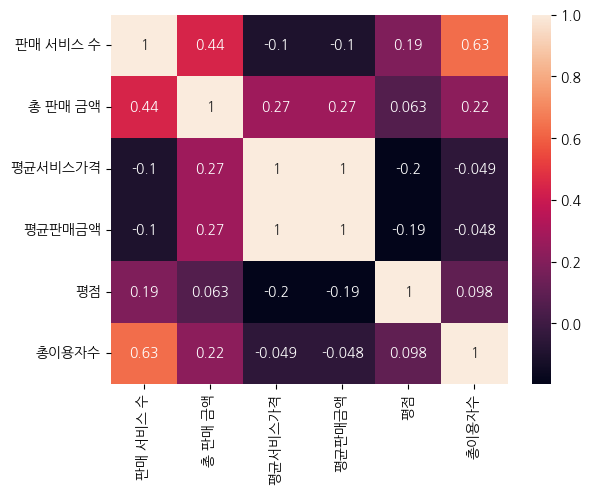

In [20]:
sns.heatmap(cor,annot=True)

In [21]:
merge_df.head()

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,평균서비스가격,평균판매금액,평점,총이용자수
0,V2_1914,0to1,16,143600,미가입,미사용,5000.000000,6987.500000,5.000000,48.0
1,V2_130,100ME,433,40852510,가입,사용,88452.655889,90524.018476,5.000000,10407.0
2,V2_958,10xDeveloper,175,5163990,미가입,미사용,23742.857143,26557.257143,4.941714,1283.0
3,V2_999,10년차웹개발자,160,4662120,미가입,사용,21312.500000,25131.625000,4.846250,4538.0
4,V2_1762,123abc,2,372600,미가입,미사용,150000.000000,168150.000000,0.000000,0.0


In [24]:
merge_df.describe(include='all')

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,평균서비스가격,평균판매금액,평점,총이용자수
count,2066,2066,2066.00000,2.066000e+03,2066,2066,2.066000e+03,2.066000e+03,2066.000000,2066.000000
unique,2066,2066,NaN,NaN,2,2,NaN,NaN,NaN,NaN
top,V2_1914,0to1,NaN,NaN,미가입,미사용,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,1774,1687,NaN,NaN,NaN,NaN
mean,NaN,NaN,166.63940,1.116331e+07,NaN,NaN,3.494762e+05,3.480845e+05,4.130945,9131.623427
std,NaN,NaN,342.30936,1.618498e+07,NaN,NaN,1.393708e+06,1.391270e+06,1.797469,43614.238892
min,NaN,NaN,1.00000,5.000000e+03,NaN,NaN,5.000000e+03,2.500000e+03,0.000000,0.000000
25%,NaN,NaN,9.00000,9.618500e+05,NaN,NaN,1.900000e+04,2.236268e+04,4.800000,8.000000
50%,NaN,NaN,36.00000,4.139370e+06,NaN,NaN,5.500000e+04,6.006310e+04,5.000000,104.000000
75%,NaN,NaN,158.75000,1.508420e+07,NaN,NaN,2.770735e+05,2.631000e+05,5.000000,1656.750000


In [25]:
cat_cols=merge_df.select_dtypes(include='object').columns
num_cols=merge_df.select_dtypes(exclude='object').columns

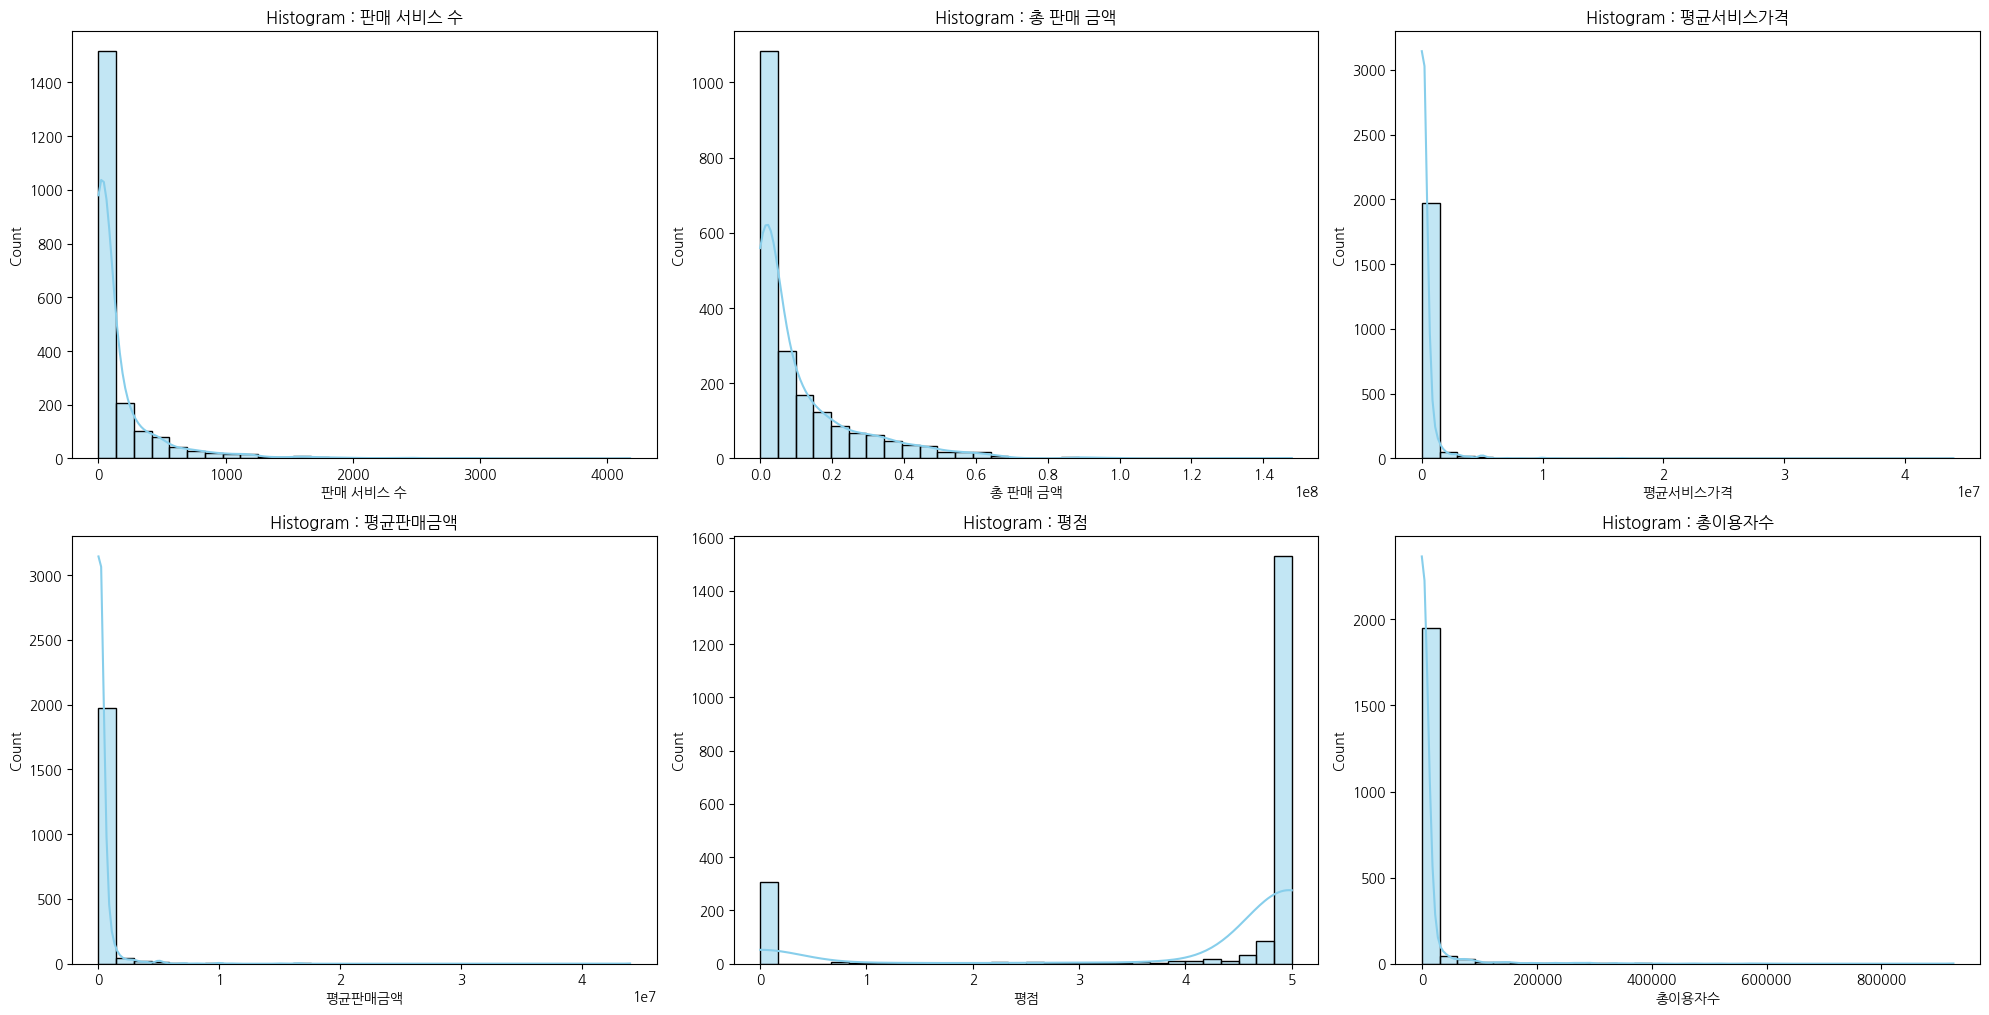

In [28]:
# 수치형 분포도

plt.figure(figsize=(20,25))

for i , feature in enumerate(num_cols,1):
    plt.subplot(5,3,i)
    sns.histplot(merge_df[feature],bins=30, kde=True, color ='skyblue', edgecolor='black')
    plt.title('Histogram : '+ feature)
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [33]:
merge_df.columns

Index(['판매자ID', '판매자', '판매 서비스 수', '총 판매 금액', '프리미엄 서비스 가입여부',
       '신속 알람 서비스 사용여부', '평균서비스가격', '평균판매금액', '평점', '총이용자수'],
      dtype='object')

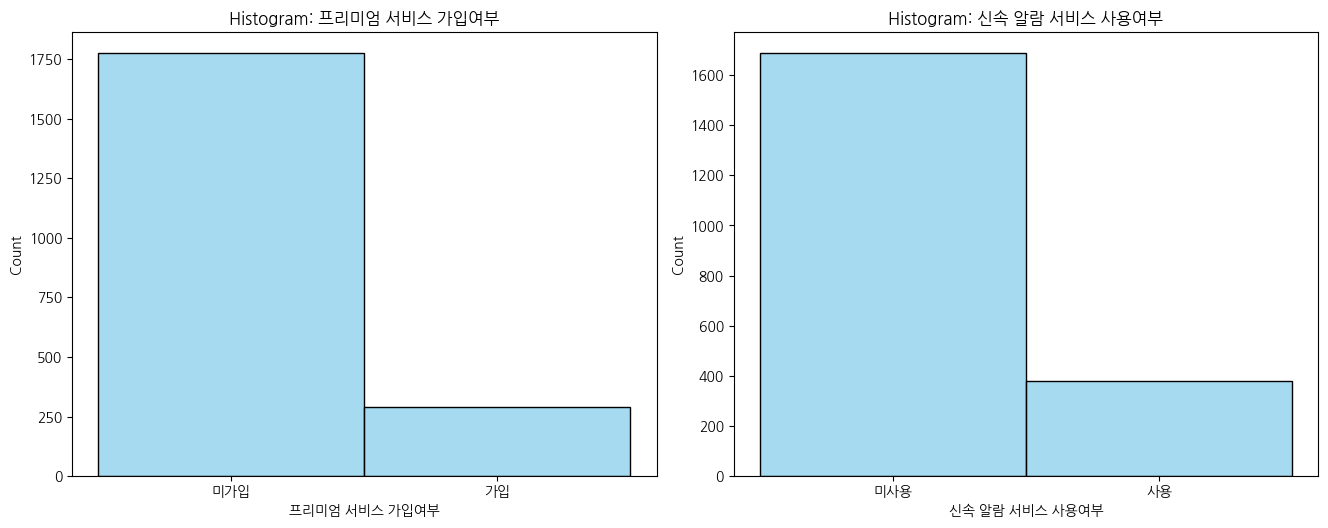

In [34]:
cat_cols=['프리미엄 서비스 가입여부',	'신속 알람 서비스 사용여부']

# 범주형

plt.figure(figsize=(20, 25))


for i, feature in enumerate(cat_cols, 1):
    plt.subplot(5,3, i)
    sns.histplot(merge_df[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title("Histogram: " + feature)
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


In [36]:
merge_df.pivot_table(index='프리미엄 서비스 가입여부', values=num_cols, aggfunc='mean')

,총 판매 금액,총이용자수,판매 서비스 수,평균서비스가격,평균판매금액,평점
프리미엄 서비스 가입여부,,,,,,
가입,3.714376e+07,23575.489726,395.366438,830898.492081,826907.398722,4.236703
미가입,6.886931e+06,6754.166291,128.990981,270234.242576,269270.329593,4.113537


In [38]:
# 가설 검정 필요 : 프리미엄 서비스 가입여부에 따라 평점에 유의미한 영향을 미친다.

from scipy import stats


premium_df=merge_df[merge_df['프리미엄 서비스 가입여부']=='가입']
non_premium_df=merge_df[merge_df['프리미엄 서비스 가입여부']=='미가입']


In [39]:
# 정규성 판정

print(stats.normaltest(premium_df['평점']))
print(stats.normaltest(non_premium_df['평점']))

NormaltestResult(statistic=113.67844448239168, pvalue=2.0655676582142759e-25)
NormaltestResult(statistic=492.4163089161199, pvalue=1.1834696345383522e-107)


In [41]:
# 둘 다 pvalue<0.05 로 비정규성을 띠고 있다.

stats.ranksums(premium_df['평점'],non_premium_df['평점'])


RanksumsResult(statistic=-1.4430449822770697, pvalue=0.14900780017529822)

In [ ]:
# 프리미엄 가입 여부는 평점에 유의미한 영향을 미치지 않는다.

In [37]:
merge_df.pivot_table(index='신속 알람 서비스 사용여부', values=num_cols, aggfunc='mean')

,총 판매 금액,총이용자수,판매 서비스 수,평균서비스가격,평균판매금액,평점
신속 알람 서비스 사용여부,,,,,,
미사용,8.801489e+06,2545.763485,66.098992,411826.63397,409482.846687,3.969838
사용,2.167621e+07,38446.519789,614.163588,71942.94066,74788.819960,4.848059


In [42]:
# 가설 검정 필요 : 신속 알람 서비스 사용 여부에 따라 평점에 유의미한 영향을 미친다.

alram_df=merge_df[merge_df['신속 알람 서비스 사용여부']=='사용']
no_alram_df=merge_df[merge_df['신속 알람 서비스 사용여부']=='미사용']


In [44]:
# 정규성 판정
print(stats.normaltest(alram_df['평점']))
print(stats.normaltest(no_alram_df['평점']))


NormaltestResult(statistic=480.0240235308502, pvalue=5.8090845793032244e-105)
NormaltestResult(statistic=361.10839918007383, pvalue=3.857513313171682e-79)


In [47]:
# 둘 다 비정규성을 띤다.


stats.ranksums(alram_df['평점'],no_alram_df['평점'])

RanksumsResult(statistic=4.232694307564097, pvalue=2.3090826591936934e-05)

In [48]:
# 신속 알람 서비스 여부에 따라 평점에 유의미한 영향을 미친다.

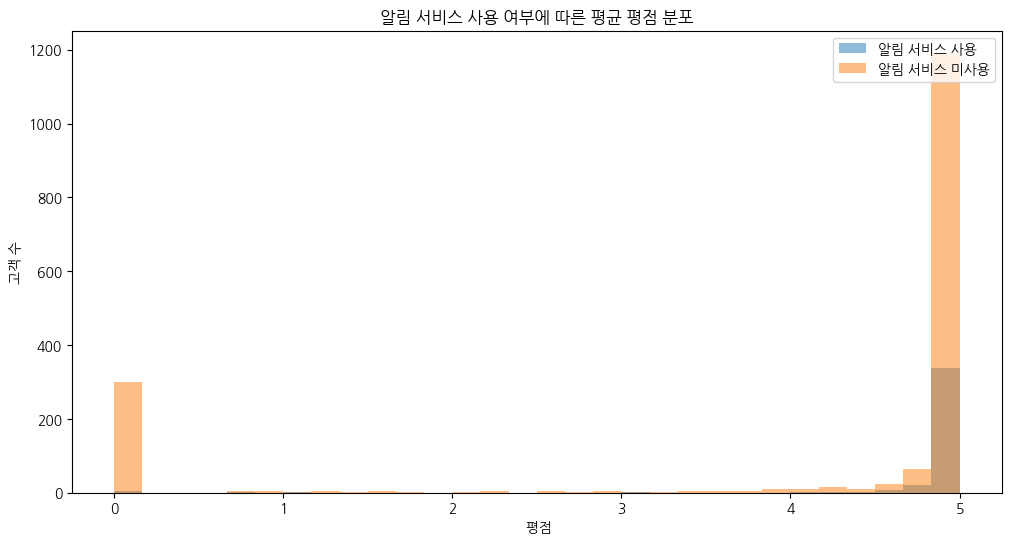

In [51]:
plt.figure(figsize=(12, 6))

# 알림 서비스 사용 고객의 평점 분포
plt.hist(alram_df['평점'], bins=30, alpha=0.5, label='알림 서비스 사용')

# 알림 서비스 미사용 고객의 평점 분포
plt.hist(no_alram_df['평점'], bins=30, alpha=0.5, label='알림 서비스 미사용')

plt.xlabel(' 평점')
plt.ylabel('고객 수')
plt.title('알림 서비스 사용 여부에 따른 평균 평점 분포')
plt.legend(loc='upper right')
plt.show()

In [54]:
# 평점이 미치는 영향 파악
# 고객은 전문가를 선택할 떄 어떤 기준으로 선택해야 알맞은 서비스를 받을 수 있을까?
# 일반적으로 평점으로 판단한다고 가정했을 때, 평점으로 서비스의 이용을 결정할 적절한 기준이 될 수 있을까?


log_df.isna().sum()

거래일자             0
수수료율             0
고객ID             0
프로그램수정횟수         0
추가결제금액           0
거래취소여부      339702
거래취소일자      339702
서비스명            22
판매자             22
판매금액            21
서비스가격           22
평점              22
이용자수            22
대분류             22
서비스번호           22
dtype: int64

In [55]:
log_df['거래취소여부']=log_df['거래취소여부'].fillna(0)
log_df['거래취소일자']=log_df['거래취소일자'].fillna(0)

In [57]:
log_df.dropna(inplace=True)

In [59]:
log_df.isna().sum()

거래일자        0
수수료율        0
고객ID        0
프로그램수정횟수    0
추가결제금액      0
거래취소여부      0
거래취소일자      0
서비스명        0
판매자         0
판매금액        0
서비스가격       0
평점          0
이용자수        0
대분류         0
서비스번호       0
dtype: int64

In [60]:
log_df['거래취소여부'].value_counts()

거래취소여부
0.0    339680
1.0      4597
Name: count, dtype: int64

<Axes: xlabel='거래취소여부', ylabel='count'>

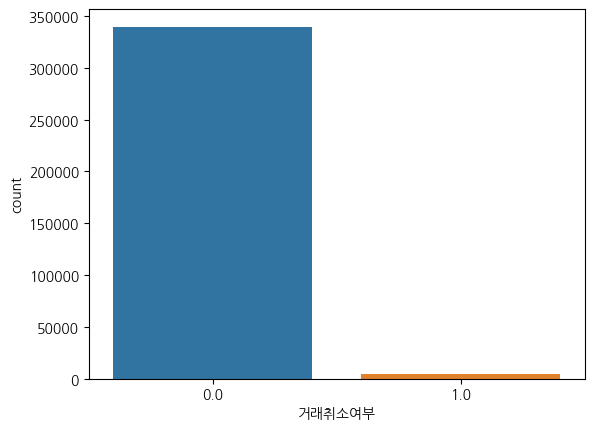

In [61]:
sns.countplot(data=log_df,x='거래취소여부')

In [62]:
log_df.columns

Index(['거래일자', '수수료율', '고객ID', '프로그램수정횟수', '추가결제금액', '거래취소여부', '거래취소일자',
       '서비스명', '판매자', '판매금액', '서비스가격', '평점', '이용자수', '대분류', '서비스번호'],
      dtype='object')

In [64]:
log_df.pivot_table(index='거래취소여부', values=['프로그램수정횟수', '추가결제금액','판매금액', '서비스가격', '평점', '이용자수'],aggfunc='mean')

,서비스가격,이용자수,추가결제금액,판매금액,평점,프로그램수정횟수
거래취소여부,,,,,,
0.0,60329.457136,54.77845,4052.348010,63844.226566,4.833312,0.18945
1.0,64822.166630,56.29541,6.634762,55.579726,4.748967,-0.99826


In [66]:
cancel_df=log_df[log_df['거래취소여부']==1]
non_cancel_df=log_df[log_df['거래취소여부']==0]


In [69]:
cancel_df.head(3)

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
174,20210201,7.5,10020100522,-1.0,0,1.0,20210201.0,고퀄리티 반응형 홈페이지를 드립니다.,포인원,0.0,270000.0,5.0,207.0,홈페이지,2146.0
246,20210201,9.0,130202005142,-1.0,0,1.0,20210201.0,사람 일을 대신하는 메크로 프로그램 개발해 드립니다.,오토프로메이커,0.0,33000.0,5.0,179.0,프로그램,2168.0
248,20210201,6.5,13020200731,-1.0,0,1.0,20210201.0,사람 일을 대신하는 메크로 프로그램 개발해 드립니다.,오토프로메이커,0.0,33000.0,5.0,179.0,프로그램,2168.0


In [71]:
# 정규성 판정

print(stats.normaltest(cancel_df['평점']))
print(stats.normaltest(non_cancel_df['평점']))


NormaltestResult(statistic=3982.504914556782, pvalue=0.0)
NormaltestResult(statistic=360955.9457686527, pvalue=0.0)


In [72]:
# 둘 다 비정규성 띤다.

stats.ranksums(cancel_df['평점'],non_cancel_df['평점'])

RanksumsResult(statistic=-2.158730049959012, pvalue=0.03087111605066262)

In [ ]:
# 거래 취소 여부별로 평점에 유의미한 차이 있다. 

<Axes: >

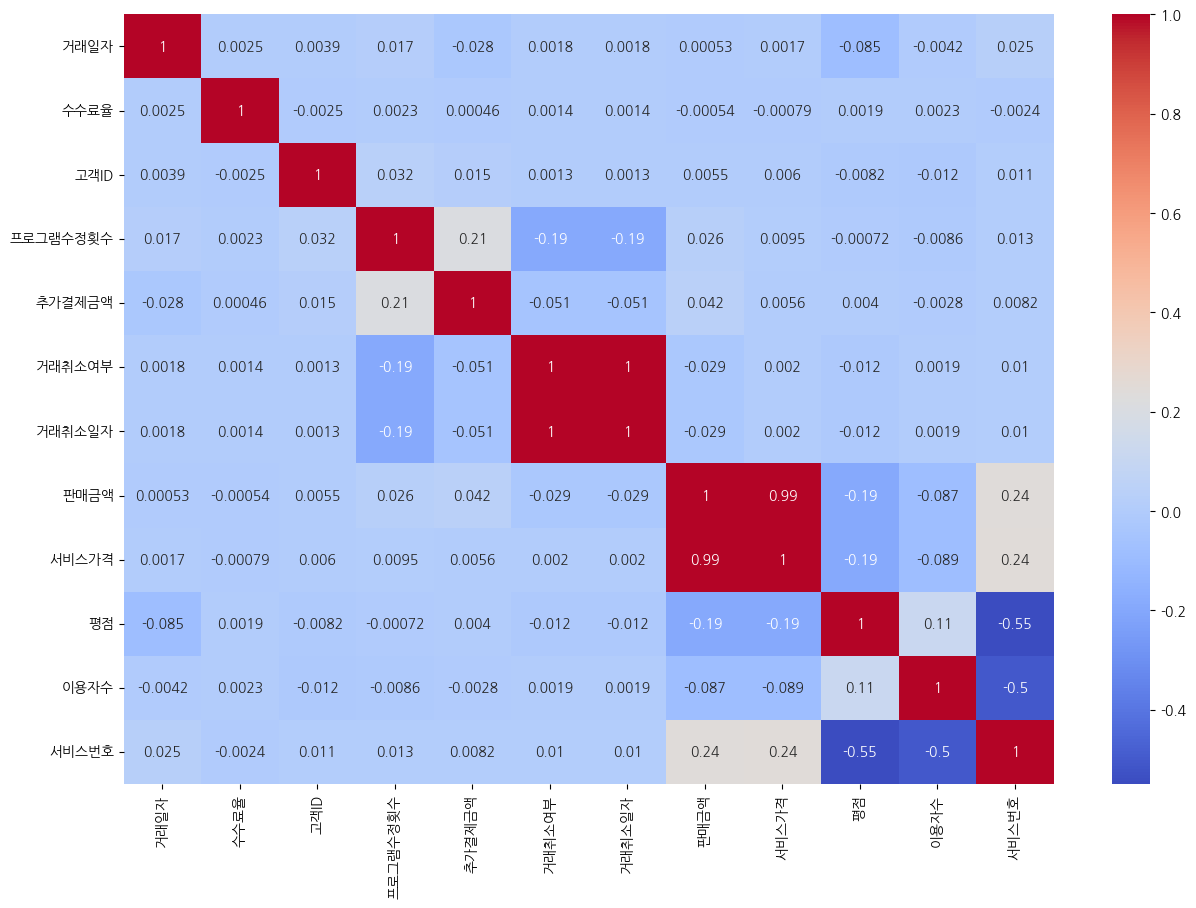

In [77]:
num_cols=log_df.select_dtypes(exclude='object').columns


plt.figure(figsize=(15,10))
cor=log_df[num_cols].corr()
sns.heatmap(cor,annot=True, cmap='coolwarm')

<Axes: xlabel='대분류'>

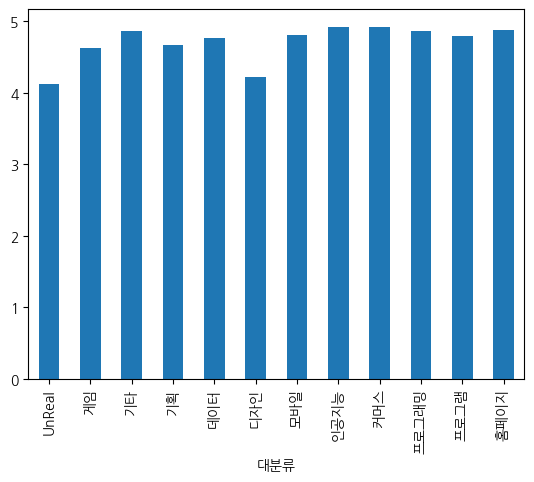

In [83]:
log_df.groupby(['대분류'])['평점'].mean().plot.bar()

In [86]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344277 entries, 0 to 344298
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   거래일자      344277 non-null  int64  
 1   수수료율      344277 non-null  float64
 2   고객ID      344277 non-null  int64  
 3   프로그램수정횟수  344277 non-null  float64
 4   추가결제금액    344277 non-null  int64  
 5   거래취소여부    344277 non-null  float64
 6   거래취소일자    344277 non-null  float64
 7   서비스명      344277 non-null  object 
 8   판매자       344277 non-null  object 
 9   판매금액      344277 non-null  float64
 10  서비스가격     344277 non-null  float64
 11  평점        344277 non-null  float64
 12  이용자수      344277 non-null  float64
 13  대분류       344277 non-null  object 
 14  서비스번호     344277 non-null  float64
dtypes: float64(9), int64(3), object(3)
memory usage: 42.0+ MB


In [93]:
# 이용자수, 판매금액, 서비스가격 이 평점에 미치는 영향  파악
# 상관 관계 분석
# 회귀분석

cor2=log_df[['이용자수', '판매금액', '서비스가격','평점']].corr()
cor2

,이용자수,판매금액,서비스가격,평점
이용자수,1.000000,-0.087263,-0.088837,0.113282
판매금액,-0.087263,1.000000,0.994394,-0.187469
서비스가격,-0.088837,0.994394,1.000000,-0.191892
평점,0.113282,-0.187469,-0.191892,1.000000


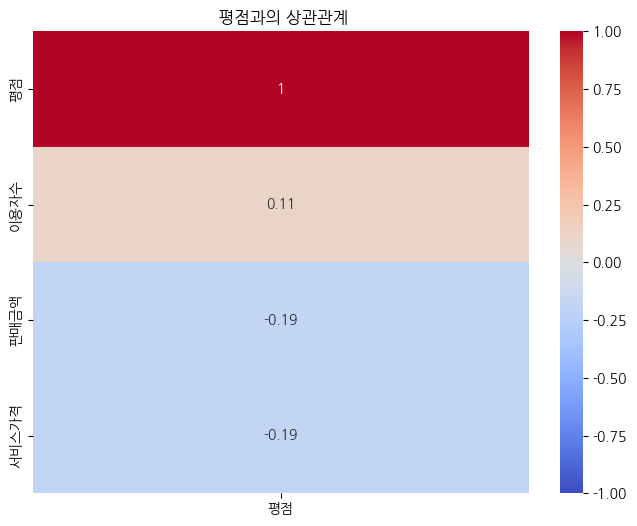

In [95]:
cor2_sorted = cor2[['평점']].sort_values(by='평점', ascending=False)

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(cor2_sorted, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(' 평점과의 상관관계')
plt.show()

In [96]:
# 회귀분석


import statsmodels.api as sm

X=log_df[['이용자수', '판매금액', '서비스가격']]
Y=log_df['평점']

In [97]:
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()

In [99]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     평점   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     5672.
Date:                Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:42:59   Log-Likelihood:            -4.0735e+05
No. Observations:              344277   AIC:                         8.147e+05
Df Residuals:                  344273   BIC:                         8.147e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8168      0.002   2959.005      0.0